# **FINAL PROJECT - PROGRAMMING FOR DATA SCIENCE** 

### COLLABORATOR
|<center><div style="width:150px">ID</div><center>|<center><div style="width:290px">Name</div><center>|
|---------- |:-------------:|
| <center>21120464<center>  | <center>Nguyễn Quốc Hưng<center> |
| <center>21120486<center>  |   <center>Võ Minh Khuê<center>   | 
| <center>21120091<center>  |<center>Hồ Sỹ Kiên<center> |

## Import libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from langdetect import detect
from wordcloud import WordCloud
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/khuevo098/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 1. Data collection

### About Dataset
- This dataset is about fatalities in the Israeli-Palestinian conflict from 2000 to 2023.
- Author : Willian Oliveira Gibin and Asaniczka.
- Usability : 10000
- License: CC0: Public Domain
- Link: https://www.kaggle.com/datasets/willianoliveiragibin/fatalities-in-the-israeli-palestinian?resource=download

### How did author collect this dataset?
- The authors collected this from news in journal, in TV, in social media and from links below:
  - https://statistics.btselem.org/en/intro
  - https://statistics.btselem.org/en/intro/demolitions
  - https://statistics.btselem.org/en/intro/fatalities
  - https://www.btselem.org/

## 2. Data pre-processing and exploration

In [2]:
# Read file csv
fatality_df = pd.read_csv('Data/fatalities_isr_pse_conflict_2000_to_2023.csv')
fatality_df.head(5)

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


### 2.0. How many rows/columns are there in the dataset?

In [3]:
# Number of rows and columns
n_rows, n_cols = fatality_df.shape
n_rows, n_cols

(11124, 16)

**Observation** 
* This dataset has 11124 rows and 16 columns.

### 2.1. What is the meaning of each row?
- Each row points out the specific information about the fatality of one person related to the war of Israel and Palestine.

### 2.2. Are there duplicated rows?

In [4]:
duplicate_rows = fatality_df[fatality_df.duplicated()]
duplicate_rows

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
9373,Name unknown to B'Tselem,2003-01-13,NaN,Palestinian,Nitzana,Israel,Israel,2003-01-13,M,Yes,NaN,NaN,gunfire,NaN,Israeli security forces,Killed by IDF gunfire after he crossed into Is...
9985,Name unknown to B'Tselem,2002-05-05,NaN,Palestinian,Karni Checkpoint,Gaza,Gaza Strip,2002-05-05,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,Killed while trying to cross the Gaza perimete...
9986,Name unknown to B'Tselem,2002-05-05,NaN,Palestinian,Kissufim,Khan Yunis,Gaza Strip,2002-05-05,NaN,Yes,NaN,NaN,gunfire,NaN,Israeli security forces,Killed after opening fire at soldiers at the c...
10234,Name unknown to B'Tselem,2002-04-01,NaN,Palestinian,Jenin R.C.,Jenin,West Bank,2002-04-01,NaN,Unknown,NaN,NaN,NaN,NaN,Israeli security forces,"Killed during ""Operation Defensive Shield."""
10817,Name unknown to B'Tselem,2001-12-02,NaN,Palestinian,Jenin,Jenin,West Bank,2001-12-02,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,NaN
10818,Name unknown to B'Tselem,2001-12-02,NaN,Palestinian,Jenin,Jenin,West Bank,2001-12-02,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,NaN
10824,Name unknown to B'Tselem,2001-12-02,NaN,Palestinian,Jenin,Jenin,West Bank,2001-12-02,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,NaN


In [5]:
#Drop duplicated rows
fatality_df = fatality_df.drop_duplicates()

#Check again
duplicate_rows = fatality_df[fatality_df.duplicated()]
num_duplicates = duplicate_rows.shape[0]
if num_duplicates == 0:
    print(f'There isn\'t any duplicated rows in the dataset.')

There isn't any duplicated rows in the dataset.


### 2.5. What is the meaning of each column?

|No.| Column Name | <center>Description<center> ||
|--|------| ---| --- |
|1|name|Name of the casualty|
|2|date_of_event|Specific date that the casualty happened|
|3|age|Age of the casualty|
|4|citizenship|Nationality of the casualty|
|5|event_location|Specific location or name of an event| 
|6|event_location_district|The district where the event took place| 
|7|event_location_region| the general geographical region where the event occurred|
|8|date_of_death|The date that the person died since the date_of_event|
|9|gender|Gender of the casualty| 
|10|took_part_in_the_hostilities| Did the casualty join the war?(Civilians or not?)| 
|11|place_of_residence|Specifies the specific place associated with the residence of the casualty.| 
|12|place_of_residence_district|Indicates the district associated with the place of the casualty.| 
|13|type_of_injury|The way that the casualty was injured or killed| 
|14|ammunition|Describes the type of ammunition associated with casualties| 
|15|killed_by|Force that made the casualty to the person in this row|
|16|notes|More information about the casualty| 

### 2.6. What is the current data type of each column?

In [6]:
len(fatality_df['name'])

11117

In [7]:
fatality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11117 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11117 non-null  object 
 1   date_of_event                 11117 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11117 non-null  object 
 4   event_location                11117 non-null  object 
 5   event_location_district       11117 non-null  object 
 6   event_location_region         11117 non-null  object 
 7   date_of_death                 11117 non-null  object 
 8   gender                        11103 non-null  object 
 9   took_part_in_the_hostilities  9687 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10827 non-null  object 
 13  a

### 2.7. Handle missing data & Convert data
- As we can see, the values missing rate of `ammunition` is approximately 50%. We can consider removing this column.
- By observing the result of `.info()`, there are some columns that need to be converted:
  - `date_of_event`, `date_of_death`: `Datetime`

In [8]:
# Convert 'date_of_event', 'date_of_death' columns to datetime type
fatality_df['date_of_event'] = pd.to_datetime(fatality_df['date_of_event'])
fatality_df['date_of_death'] = pd.to_datetime(fatality_df['date_of_death'])

In [9]:
# Drop 'ammunition' column
del fatality_df['ammunition']

In [10]:
# Checking result
fatality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11117 entries, 0 to 11123
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name                          11117 non-null  object        
 1   date_of_event                 11117 non-null  datetime64[ns]
 2   age                           10995 non-null  float64       
 3   citizenship                   11117 non-null  object        
 4   event_location                11117 non-null  object        
 5   event_location_district       11117 non-null  object        
 6   event_location_region         11117 non-null  object        
 7   date_of_death                 11117 non-null  datetime64[ns]
 8   gender                        11103 non-null  object        
 9   took_part_in_the_hostilities  9687 non-null   object        
 10  place_of_residence            11056 non-null  object        
 11  place_of_residence_district 

### 2.7. With each numerical column, how are values distributed?

For columns with numeric data types, we will calculate:
- Percentage (from 0 to 100) of missing values
- The min
- The lower quartile
- The median
- The upper quartile
- The max

We will save the results to a DataFrame `num_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `fatality_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

In [11]:
# Define num_col_info_df
num_col_info_df = None

# Define missing ratio
def missing_ratio(series):
    return series.isna().sum() / len(series)

# Define lower quartile
def lower_quartile(series):
    return series.quantile(0.25)

# Define upper quartile
def upper_quartile(series):
    return series.quantile(0.75)

#Define median
def median(series):
    return series.median()

num_col_info_df = fatality_df.select_dtypes(include=['int64', 'float64'])

num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

num_col_info_df

,age
missing_ratio,0.010974
min,1.000000
lower_quartile,19.000000
median,23.000000
upper_quartile,31.000000
max,112.000000


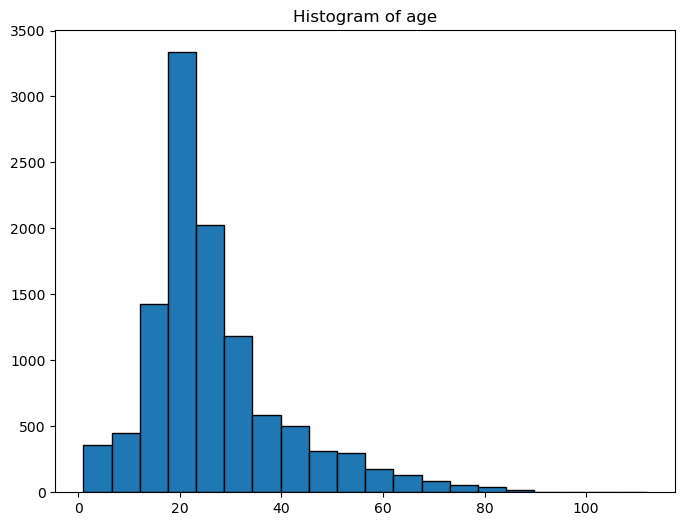

In [12]:
# Histogram for each column of numbericals
numerical_columns = fatality_df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(fatality_df[column].dropna(), bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.show()

There are missing values in `age` column, so we can fill in these missing values with median value.

In [13]:
# Replace None with nan since .fillna() working with nan
fatality_df['age'] = fatality_df['age'].replace('None', np.nan)
    
# Replace all NaN values with the median of the column values.
fatality_df['age'] = fatality_df['age'].fillna(fatality_df['age'].median())

# check the result
fatality_df['age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 11117 entries, 0 to 11123
Series name: age
Non-Null Count  Dtype  
--------------  -----  
11117 non-null  float64
dtypes: float64(1)
memory usage: 173.7 KB


### 2.8. With each categorical column, how are values distributed?

After handling numeric columns, we will handle categorical columns which have type `object`. For these columns, we calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values).
- The distribution of values (we do not consider missing values): we use a dictionary to store , key is the value, value is the distribution of values

We will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `fatality_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

In [14]:
# Setting view
pd.set_option('display.max_colwidth', 200) # For clearly
pd.set_option('display.max_columns', None) # For clearly

# Define cat_col_info_df
cat_col_info_df = fatality_df.select_dtypes(include='object')

# Define num values
def num_diff_vals(series):
    return len(series.dropna().unique())

# Define distribution
def distribution(series):
    return series.dropna().value_counts().to_dict()

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_diff_vals, distribution])
cat_col_info_df

,name,citizenship,event_location,event_location_district,event_location_region,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,killed_by,notes
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.001259,0.128632,0.005487,0.005487,0.026086,0.0,0.024917
num_diff_vals,11083,4,494,20,3,2,5,580,20,13,3,6744
distribution,"{'Name unknown to B'Tselem': 16, 'Iyad Salah 'Abd al-Hafez Qafah': 2, 'Muhammad Fouad Khalil Hijazi': 2, 'Muhannad 'Omar Muhammad a-Nashasi': 2, 'Tareq Rasmi Dufish': 2, 'Walid Ibrahim Sa'id Mahmo...","{'Palestinian': 10085, 'Israeli': 1029, 'Jordanian': 2, 'American': 1}","{'Gaza City': 2232, 'Rafah': 832, 'Khan Yunis': 538, 'Jabalya R.C.': 477, 'Beit Lahiya': 471, 'Jabalya': 411, 'Beit Hanoun': 409, 'Nablus': 293, 'al-Bureij R.C.': 240, 'Deir al-Balah': 220, 'Jerus...","{'Gaza': 2434, 'North Gaza': 1910, 'Khan Yunis': 1393, 'Rafah': 1066, 'Deir al-Balah': 854, 'Israel': 678, 'Nablus': 647, 'Jenin': 508, 'Ramallah and al-Bira': 350, 'Hebron': 347, 'Tulkarm': 254, ...","{'Gaza Strip': 7731, 'West Bank': 2708, 'Israel': 678}","{'M': 9680, 'F': 1423}","{'No': 4653, 'Yes': 3465, 'Israelis': 771, 'Unknown': 598, 'Object of targeted killing': 200}","{'Gaza city': 2283, 'Rafah': 892, 'Khan Yunis': 717, 'Jabalya R.C.': 565, 'Beit Lahiya': 479, 'Jabalya': 384, 'Beit Hanun': 352, 'Nablus': 244, 'a-Nuseirat Camp': 238, 'al-Bureij R.C.': 227, 'Deir...","{'Gaza': 2453, 'North Gaza': 1831, 'Khan Yunis': 1367, 'Rafah': 1097, 'Deir al-Balah': 875, 'Israel': 726, 'Nablus': 621, 'Jenin': 540, 'Hebron': 380, 'Ramallah and al-Bira': 295, 'Tulkarm': 258, ...","{'gunfire': 9843, 'explosion': 555, 'shelling': 311, 'stabbing': 48, 'house demolition': 25, 'hit by a vehicle': 18, 'beating': 9, 'stones throwing': 6, 'being bludgeoned with an axe': 4, 'fire': ...","{'Israeli security forces': 9993, 'Palestinian civilians': 1028, 'Israeli civilians': 96}","{'Killed during ""Operation Defensive Shield.""': 112, 'Killed during operation ""Days of Repentance"".': 88, 'Killed at police station near the Legislative Council building.': 88, 'Killed during an e..."


In [15]:
# Selecting categorical columns
categorical_columns = fatality_df.select_dtypes(include=['object']).columns

# Show a few unique values for each categorical column
for column in categorical_columns:
    unique_values = fatality_df[column].unique()[:5] 
    print(f"Unique values for {column}: {unique_values}")
    print("\n")

Unique values for name: ["'Abd a-Rahman Suleiman Muhammad Abu Daghash"
 "Usayed Farhan Muhammad 'Ali Abu 'Ali" "'Abdallah 'Imad Sa'ed Abu Hassan"
 'Durgham Muhammad Yihya al-Akhras' "Raafat 'Omar Ahmad Khamaisah"]


Unique values for citizenship: ['Palestinian' 'Israeli' 'Jordanian' 'American']


Unique values for event_location: ['Nur Shams R.C.' 'Kfar Dan' "'Aqbat Jaber R.C." 'Jenin R.C.' 'Gaza City']


Unique values for event_location_district: ['Tulkarm' 'Jenin' 'Jericho' 'Gaza' 'Hebron']


Unique values for event_location_region: ['West Bank' 'Gaza Strip' 'Israel']


Unique values for gender: ['M' 'F' nan]


Unique values for took_part_in_the_hostilities: [nan 'No' 'Yes' 'Unknown' 'Israelis']


Unique values for place_of_residence: ['Nur Shams R.C.' 'al-Yamun' "'Aqbat Jaber R.C." 'Jenin' 'Khan Yunis']


Unique values for place_of_residence_district: ['Tulkarm' 'Jenin' 'Jericho' 'Khan Yunis' 'Hebron']


Unique values for type_of_injury: ['gunfire' 'stabbing' 'hit by a vehicle' 'exp

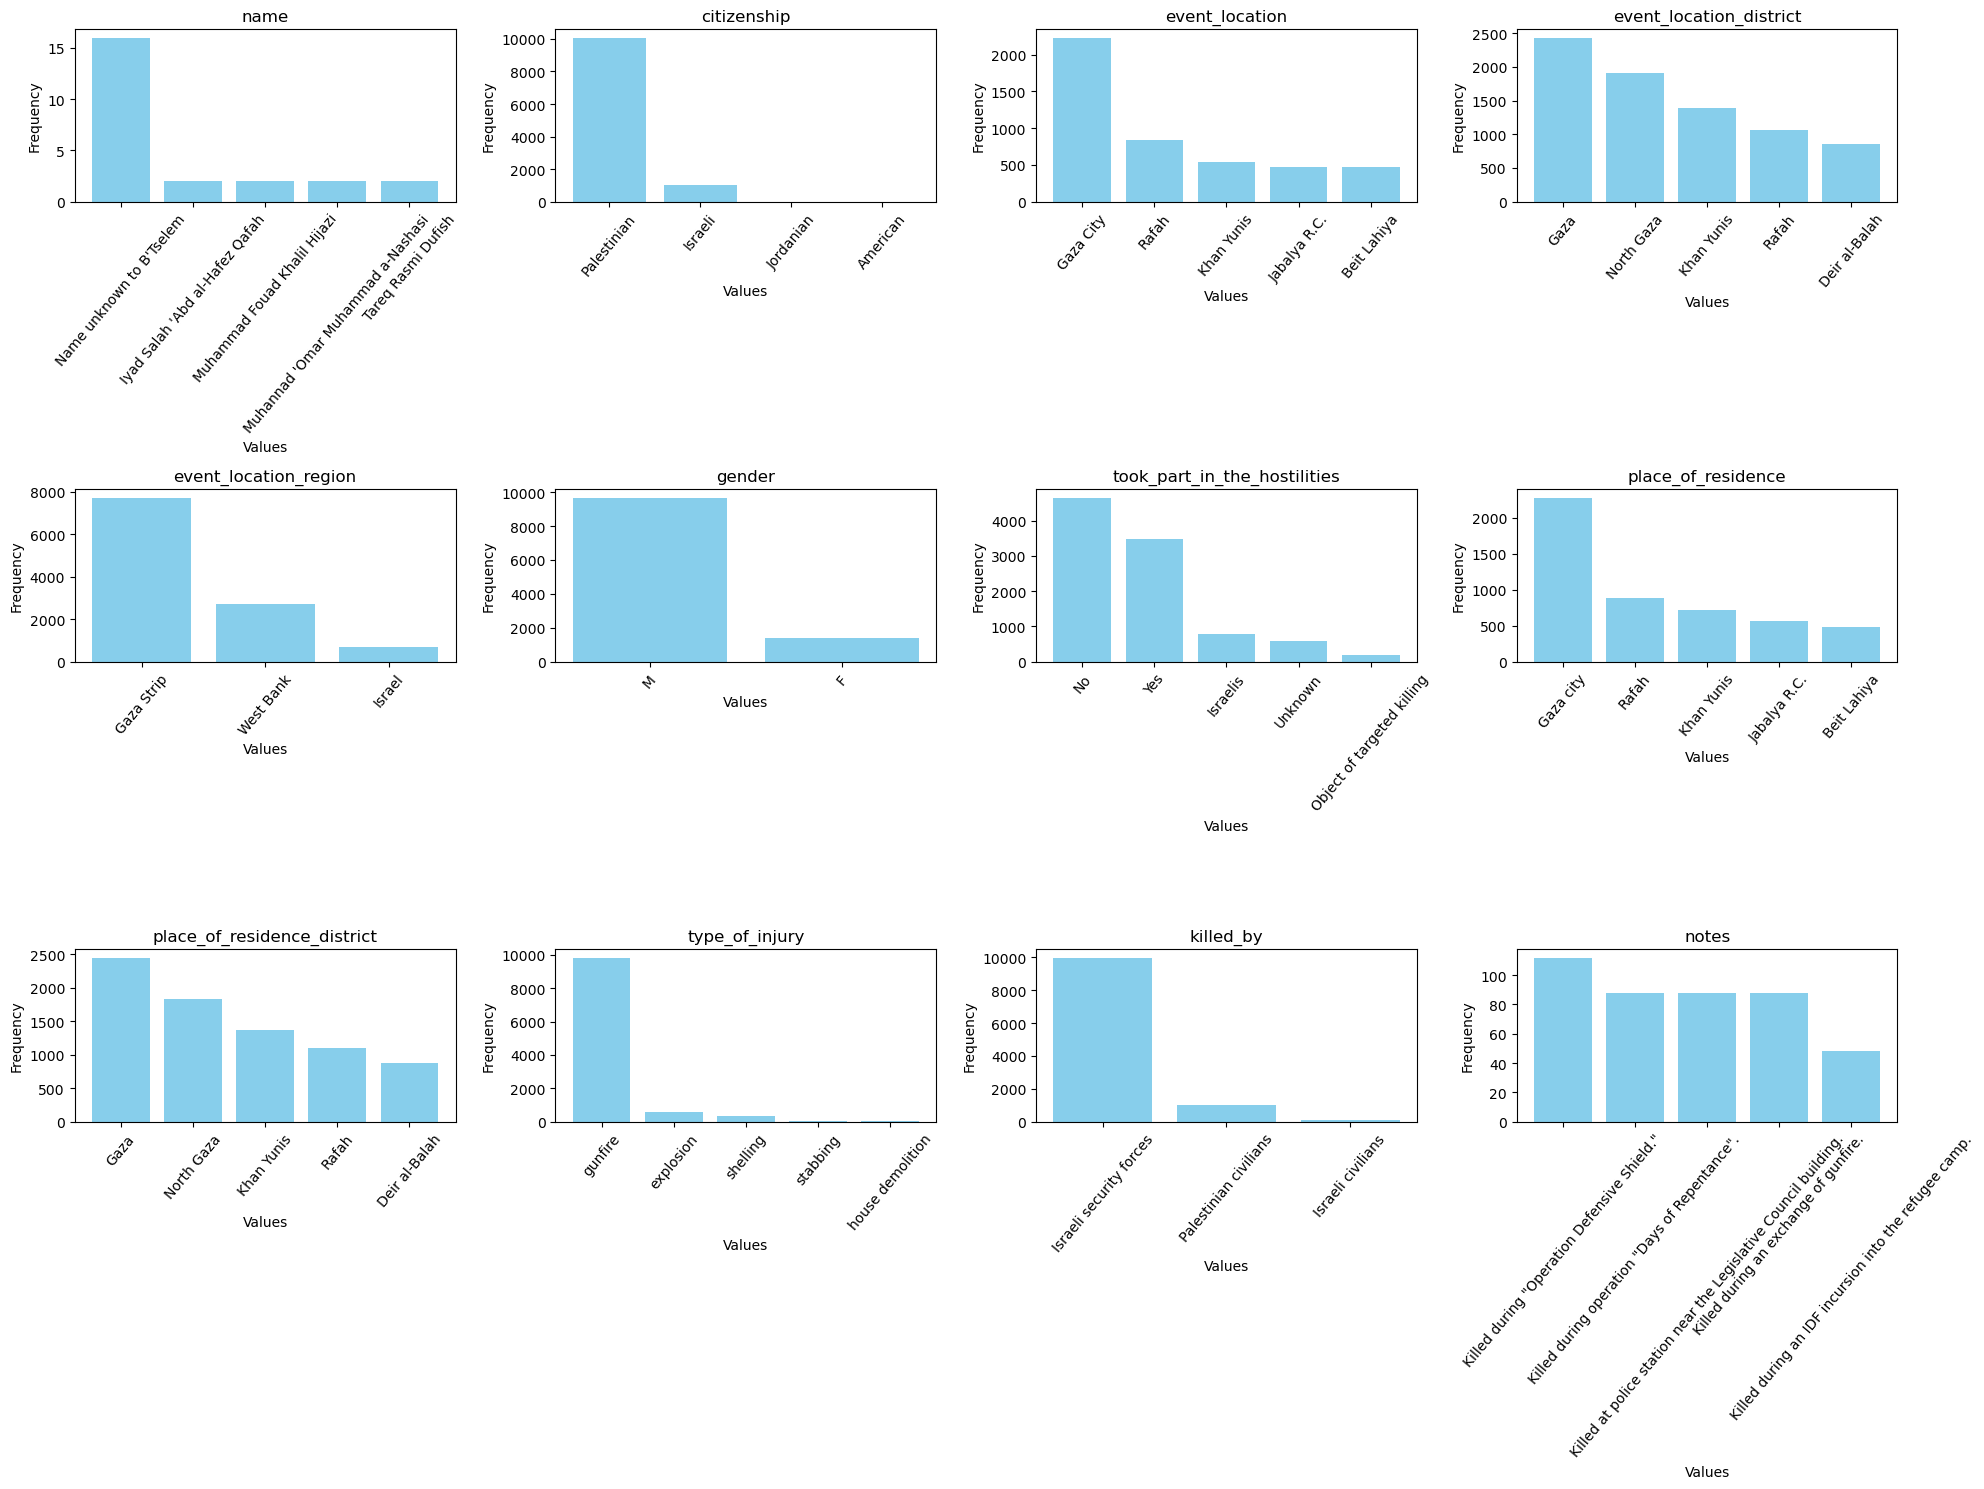

In [16]:
# Visualize the 5 values with the highest frequency of each column
fig, ax = plt.subplots(3, 4, figsize=(20,15))
ax = ax.flatten()

index = 0
for column, data in cat_col_info_df.items():
    values = data['distribution']
    sorted_values = sorted(values.items(), key=lambda x: x[1], reverse=True)[:5]  # Get top 5 values
    
    top_labels = [x[0] for x in sorted_values] # Get the label
    top_counts = [x[1] for x in sorted_values] # Get the value
    
    ax[index].bar(top_labels, top_counts, color='skyblue')
    ax[index].set_title(f'{column}')
    ax[index].set_xlabel('Values')
    ax[index].set_ylabel('Frequency')
    ax[index].set_xticks(range(len(top_labels)))  # Set custom x-ticks positions
    ax[index].set_xticklabels(top_labels, rotation=50)  # Set custom x-tick labels with rotation
    index += 1
plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import chi2_contingency

# Hàm tính phi hệ số Cramér cho cặp biến
def cramers_v(var1, var2):
    contingency_table = pd.crosstab(fatality_df[var1], fatality_df[var2])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.values.sum()
    v = np.sqrt(chi2 / (n * min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)))
    return v

# Tính phi hệ số Cramér cho tất cả các cặp biến trong DataFrame
columns = fatality_df.columns
cramers_matrix = pd.DataFrame(index=columns, columns=columns)

for var1 in columns:
    for var2 in columns:
        cramers_matrix.loc[var1, var2] = cramers_v(var1, var2)

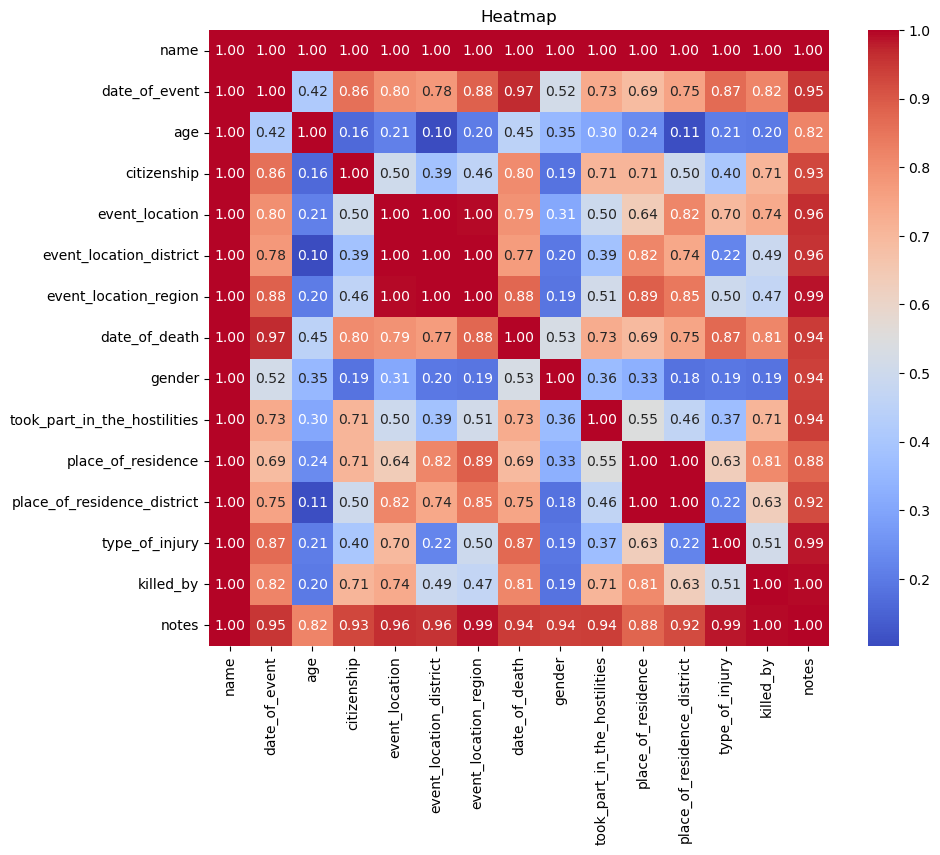

In [18]:
copy = cramers_matrix.copy()
copy = copy.astype(float)

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(copy, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap")
plt.show()

## 3. Ask meaningful questions

### Question 1. What is the trend in the age distribution of casualties in the dataset?
Benefits of finding the answer: Understanding the age distribution can provide insights into whether certain age groups are more vulnerable or involved in the events, which may inform targeted interventions or policies.

#### Preprocess
1. Check for missing or invalid age values: Identify and handle any missing or invalid age entries in the dataset.
2. Group ages into bins: Categorize ages into bins (e.g., 0-10, 11-20, etc.) for a more concise and interpretable age distribution.

In [19]:
# Check for missing or invalid age values
fatality_df = fatality_df.dropna(subset=['age'])  # Drop rows with missing age values

# Group ages into bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
fatality_df['age_group'] = pd.cut(fatality_df['age'], bins=age_bins)

#### Analysis
1. Plot a histogram: Visualize the age distribution using a histogram to observe the overall pattern.
2. Calculate descriptive statistics: Compute descriptive statistics such as the mean and median to summarize central tendencies.

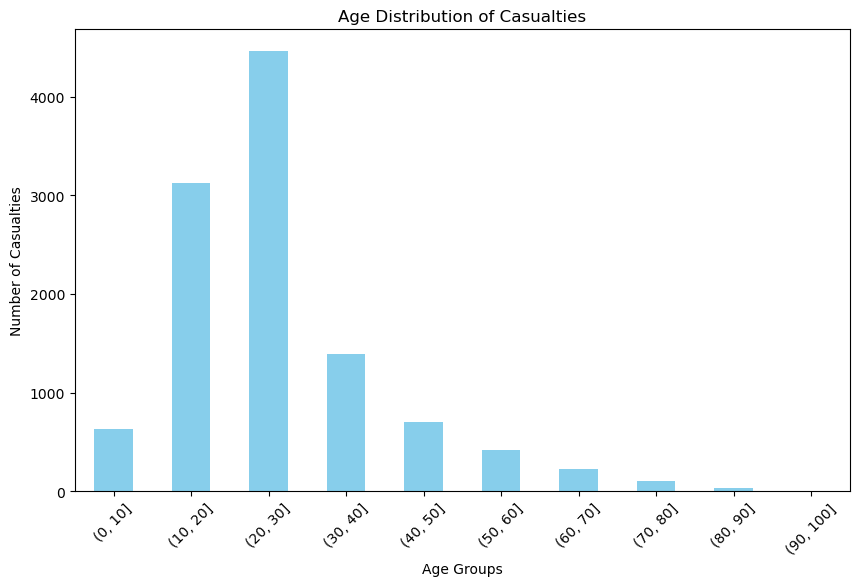

Mean Age: 26.70
Median Age: 23.00


In [20]:
# Plot a histogram
plt.figure(figsize=(10, 6))
fatality_df['age_group'].value_counts(sort=False).plot(kind='bar', color='skyblue')
plt.title('Age Distribution of Casualties')
plt.xlabel('Age Groups')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.show()

# Calculate descriptive statistics
mean_age = fatality_df['age'].mean()
median_age = fatality_df['age'].median()

print(f'Mean Age: {mean_age:.2f}')
print(f'Median Age: {median_age:.2f}')

Comment: 
- The age group with the highest number of casualties is between 20 and 30. And the number of casualties decreases with age.
- It can be seen that the casualties are young.

### Question 2. What additional information from the "notes" column provides context or insights into specific casualties or events?
Benefits of finding the answer: Analyzing the notes column can reveal additional details that may not be captured in other columns, providing a more comprehensive understanding of individual cases and the overall context of the events.

#### Preprocessing
1. Explore and extract relevant information: Examine the "notes" column to identify patterns, keywords, or specific details that provide context or insights.
2. Clean and preprocess text: Apply text preprocessing techniques, such as removing stopwords, punctuation, and irrelevant characters, to enhance the readability and extract meaningful information.

In [21]:
# Explore and extract relevant information from the "notes" column
notes_text = ' '.join(fatality_df['notes'].astype(str))

# Clean and preprocess text
stop_words = set(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words=list(stop_words))  # Convert set to list
X = vectorizer.fit_transform([notes_text])

#### Analysis
1. Summarize key information: Create summaries or key insights from the extracted information in the "notes" column.
2. Use Natural Language Processing (NLP) techniques: Apply NLP methods like sentiment analysis, named entity recognition, or topic modeling to extract and categorize information from the text.

In [22]:
# Summarize key information
print("Top 5 most frequent words in the 'notes' column:")
feature_names = vectorizer.get_feature_names_out()
word_frequencies = X.sum(axis=0).A1
top_words = [feature_names[i] for i in word_frequencies.argsort()[-5:][::-1]]
print(top_words)

# Topic modeling using Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)
feature_names = vectorizer.get_feature_names_out()
print("\nTop words for each topic:")
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-5:][::-1]]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

Top 5 most frequent words in the 'notes' column:
['killed', 'home', 'family', 'soldiers', 'military']

Top words for each topic:
Topic #1: killed, home, family, soldiers, military
Topic #2: תחנת, kippur, khamaiseh, khanafsah, kharubi
Topic #3: תחנת, kippur, khamaiseh, khanafsah, kharubi


Comment: 
- Topic #1: The words 'killed,' 'home,' 'family,' 'soldiers,' and 'military' are dominant in this topic, suggesting a focus on casualties, home, and military activities.
- The LDA model captures relevant terms.
- Topic #2 and Topic #3: These topics seem to contain non-English words, possibly due to the dataset containing multiple languages. Additional preprocessing may be needed to handle multilingual content.

In [23]:
#pip install folium

### Question 3.  How do the numbers of fatalities of each gender in Israel - Palestine raise over years?

**Benefits of finding the answer:** Answer this question will help us better understand the raising of the conflict in Israel - Palestine over the years and shed light on potential vulnerabilities or targeted demographics in conflict zones. It helps in recognizing and addressing potential gender-based issues in conflict situations, and raise public awareness about the different impacts of conflicts on men and women.

**Preprocess:**
   1. Make a copy of Dataframe to avoid conflicts and create a column named `year` from column `date_of_event`.  
   2. Group dataset by `year` and calculate the value count of gender of each group to get the number of fatalities of each year. Then save the result to a dictionary named `num_of_fatalities`.  Save distribution of male and female deaths to 2 dictionaries named `male_fatalities` and `female_fatalities`

In [24]:
# Create a copy of dataframe
copy_df = fatality_df.copy()

# Create 'year' column
copy_df['year'] = copy_df['date_of_event'].dt.year

# Calculate fatalities of each year
num_of_fatalities = copy_df.groupby('year')['gender'].value_counts().to_dict()

# Save distribution of male and female deaths to 2 dictionaries named 'male_fatalities' and 'female_fatalities'
male_fatalities = {}
female_fatalities = {}

for (year, gender), value in num_of_fatalities.items():
    if gender == 'M':
        male_fatalities[year] = value
    elif gender == 'F':
        female_fatalities[year] = value
# Display
print('Male fatalities over years: \n')
print(male_fatalities)
print('Female fatalities over years: \n')
print(female_fatalities)

Male fatalities over years: 

{2000: 28, 2001: 283, 2002: 1112, 2003: 656, 2004: 869, 2005: 215, 2006: 616, 2007: 388, 2008: 862, 2009: 856, 2010: 85, 2011: 124, 2012: 238, 2013: 39, 2014: 1837, 2015: 162, 2016: 99, 2017: 71, 2018: 295, 2019: 132, 2020: 29, 2021: 259, 2022: 192, 2023: 233}
Female fatalities over years: 

{2000: 7, 2001: 65, 2002: 198, 2003: 76, 2004: 59, 2005: 19, 2006: 68, 2007: 7, 2008: 53, 2009: 189, 2010: 4, 2011: 5, 2012: 23, 2013: 2, 2014: 495, 2015: 15, 2016: 17, 2017: 5, 2018: 7, 2019: 13, 2020: 1, 2021: 66, 2022: 13, 2023: 16}


**Analysis:**  

   1. Plot a group bar chart: Visualize the distribution of each gender over years using a group bar chart in which the x-axis is the year and one year is a group of two bar charts which are the number of fatalities of each gender. Then observe the overall pattern from the graph.

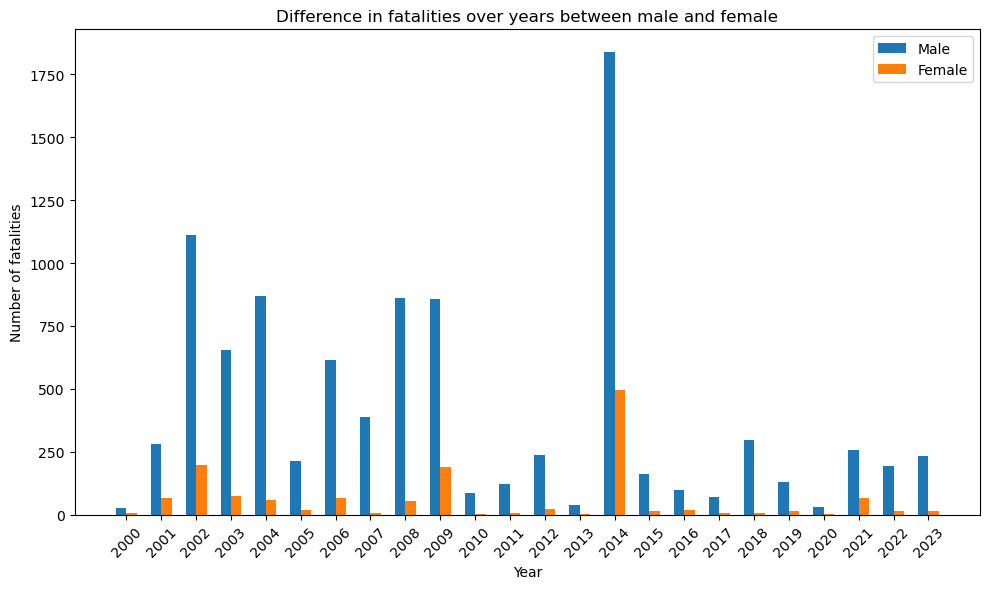

In [25]:
# Visualize the result

years = list(male_fatalities.keys()) # Get list of year
male_values = list(male_fatalities.values()) # Get list of male's values
female_values = list(female_fatalities.values()) # Get list of female's values

x = range(len(years))  # Set the x-axis positions
width = 0.3  # Set the width of each bar

plt.figure(figsize=(10, 6))

plt.bar(x, male_values, width, label='Male')  # Bar for male values
plt.bar([pos + width for pos in x], female_values, width, label='Female')  # Bar for female values

plt.xlabel('Year')  # Set the x-axis label
plt.ylabel('Number of fatalities')  # Set the y-axis label
plt.title('Difference in fatalities over years between male and female')  # Set the chart title
plt.xticks([pos + width / 2 for pos in x], years, rotation = 45)  # Set the x-axis tick positions and labels
plt.legend()  # Add a legend

plt.tight_layout()
plt.show()  # Display the chart

Comment: 

- Here we can see mostly people are killed in 2014 in both two gender and the majority are males. 
- Through 23 years from 2000, they always tend to target males since the number of males' fatalities always higher then the female's one. So we can understand that they focused on eradicating the males to make nation weaker. 

### Question 4.  Are the any trends of fatalities in the top battlefield over years?

**Benefits of finding the answer:** Answer this question will provides insights into the varying impacts of conflict on local communities. It helps in understanding the diverse levels of vulnerability and trauma experienced by different regions.It will allows humanitarian organizations to optimize their response efforts, ensuring that aid and support reach the most affected regions.

**Preprocess:**
   1. Make a copy of Dataframe to avoid conflicts and create a column named `year` from column `date_of_event`.  
   2. Find the top fatalities by top `n` places (in this notebook we choose n = 5) get save the places in the `top_places`
   3. Filter the data with top n places from `top_places`
   4. Group by years and places to get the number of fatalities of diffence places over years and save it to `fatalities_by_place`

In [26]:
# Create 'year' column
fatality_df['year'] = fatality_df['date_of_event'].dt.year

# Choose the top N places to focus on
top_n_places = 5 

# Get the top N places with the highest total fatalities
top_places = fatality_df['event_location_district'].value_counts().nlargest(top_n_places).index

# Filter the data to include only the top N places
filtered_data = fatality_df[fatality_df['event_location_district'].isin(top_places)]

# Group by place and year, and sum the number of fatalities
fatalities_by_place = filtered_data.groupby(['event_location_district', 'year']).size().reset_index(name='fatalities_count')

# Display
fatalities_by_place

,event_location_district,year,fatalities_count
0,Deir al-Balah,2000,4
1,Deir al-Balah,2001,7
2,Deir al-Balah,2002,73
3,Deir al-Balah,2003,60
4,Deir al-Balah,2004,52
...,...,...,...
104,Rafah,2018,34
105,Rafah,2019,9
106,Rafah,2021,9
107,Rafah,2022,7


**Analysis:**

   1. Plot a line graph: Visualize the result above with a line graph in which each color stand for fatalities of each places. Find the trend from the graph and summarize it.
   2. Find the max number of each places for easier summarizing

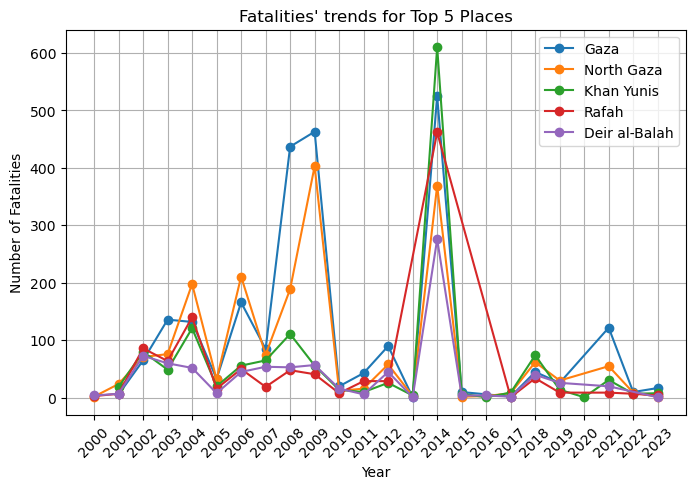

The max fatalities recorded by each place: 

	- Gaza : 525 recorded in 2014
	- North Gaza : 403 recorded in 2009
	- Khan Yunis : 610 recorded in 2014
	- Rafah : 462 recorded in 2014
	- Deir al-Balah : 276 recorded in 2014


In [27]:
# Create a line plot for each place
plt.figure(figsize=(8, 5))

# Get list of years
years = list(fatalities_by_place['year'].unique())

# Plot for each place
for place in top_places:
    data = fatalities_by_place[fatalities_by_place['event_location_district'] == place]
    plt.plot(data['year'], data['fatalities_count'], linestyle='-', marker='o', label=place)

# Set information for the graph
plt.title(f"Fatalities' trends for Top {top_n_places} Places")
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.xticks(years, rotation = 45)
plt.grid(True)
plt.legend()
plt.show()

print('The max fatalities recorded by each place: \n')
for place in top_places:
    max_fatalities_by_place = fatalities_by_place[fatalities_by_place['event_location_district'] == place]['fatalities_count'].max()
    year_record =  fatalities_by_place[fatalities_by_place['fatalities_count'] ==  max_fatalities_by_place]['year'].values[0]
    print(f'\t- {place} : {max_fatalities_by_place} recorded in {year_record}')

Comment:
- Overall trends:
    - All the places seem to have the highest number of fatalities in 2014, except for North Gaza.
    - Fatalities have fluctuated significantly over the years, with several peaks and valleys.
    - The highest number of fatalities occurred in `Khan Yunis` in 2014, with 610 fatalities.
    - North Gaza has also experienced high numbers of fatalities, particularly in 2009 and 2014.
    - Khan Yunis, Rafah, and Deir al-Balah have seen relatively lower numbers of fatalities, but have still experienced periods of significant violence.


### Question 5: What is the distribution of fatalities based on citizenship? How has the distribution of fatalities among different citizenship groups changed over the years of the conflict?

**Benefits of answering this question:** Understanding the distribution of fatalities based on citizenship in the Israel-Palestine conflict and tracking changes over time offers invaluable insights. Such as raises public awareness, aids academic research, and underscores the need for nuanced approaches to address the complexities of the conflict.

Preprocessing:
1. Make a copy of Dataframe to avoid conflicts and create a column named year from column `date_of_event`.
2. Group the dataset by `citizenship` then find out the distribution of fatalities based on citizenship.
3. Based on column named year, group dataset by this column and count value of each citizenship to attain the number of fatalities of each year. Save the result to dictionaries that the number of dictionaries corresponds to the number of unique citizenship in this dataset.

In [28]:
fatality_df['date_of_event'] = pd.to_datetime(fatality_df['date_of_event'])
df_copy = fatality_df.copy()

In [29]:
citizenship_counts = df_copy['citizenship'].value_counts()
citizenship_counts

Palestinian    10085
Israeli         1029
Jordanian          2
American           1
Name: citizenship, dtype: int64

In [30]:
df_copy['year'] = df_copy['date_of_event'].dt.year
num_of_fatalities = df_copy.groupby('year')['citizenship'].value_counts().to_dict()

palestine = {}
israel = {}
jordan = {}
america = {}

for (year,citizenship),value in num_of_fatalities.items():
    if citizenship == 'Palestinian':
        palestine[year] = value
    if citizenship == 'Jordanian':
        jordan[year] = value
    if citizenship == 'Israeli':
        israel[year] = value
    if citizenship == 'American':
        america[year] = value
print('Palestinian:')
print(palestine)
print('Israeli: ')
print(israel)
print('Jordanian: ')
print(jordan)
print('American: ')
print(america)

Palestinian:
{2000: 6, 2001: 189, 2002: 1031, 2003: 586, 2004: 829, 2005: 190, 2006: 665, 2007: 385, 2008: 885, 2009: 1036, 2010: 82, 2011: 117, 2012: 256, 2013: 38, 2014: 2272, 2015: 157, 2016: 107, 2017: 69, 2018: 295, 2019: 136, 2020: 28, 2021: 316, 2022: 187, 2023: 223}
Israeli: 
{2000: 29, 2001: 161, 2002: 291, 2003: 146, 2004: 99, 2005: 44, 2006: 19, 2007: 10, 2008: 30, 2009: 9, 2010: 7, 2011: 12, 2012: 5, 2013: 3, 2014: 59, 2015: 20, 2016: 8, 2017: 7, 2018: 7, 2019: 9, 2020: 2, 2021: 9, 2022: 17, 2023: 26}
Jordanian: 
{2014: 1, 2022: 1}
American: 
{2016: 1}


Analysis:
  - `Convert` keys of `palestine(or israel)` to list. Since `palestine(or israel)` has `full` years from 2000 to 2023, the others have missing keys so we don't choose them.
  - `Create` 4 lists named `'valueX'` by retrieving the values corresponding to each year from each dictionary. If the year is not present in the dictionary, it assigns `None` to the corresponding position in the list.
  - `Plot` 2 chart in one figure using `subplots(1 row, 2 cols)`.
- `Plot a line graph`: each line corresponds to each color that noted in the legend. Then observe the changes in the trends of fatalities among the countries and give a conclusion about them.
- `Plot a pie chart` from above result. Point out the distribution of each country. Finally, find out which country has the most number of fatalities ever before.

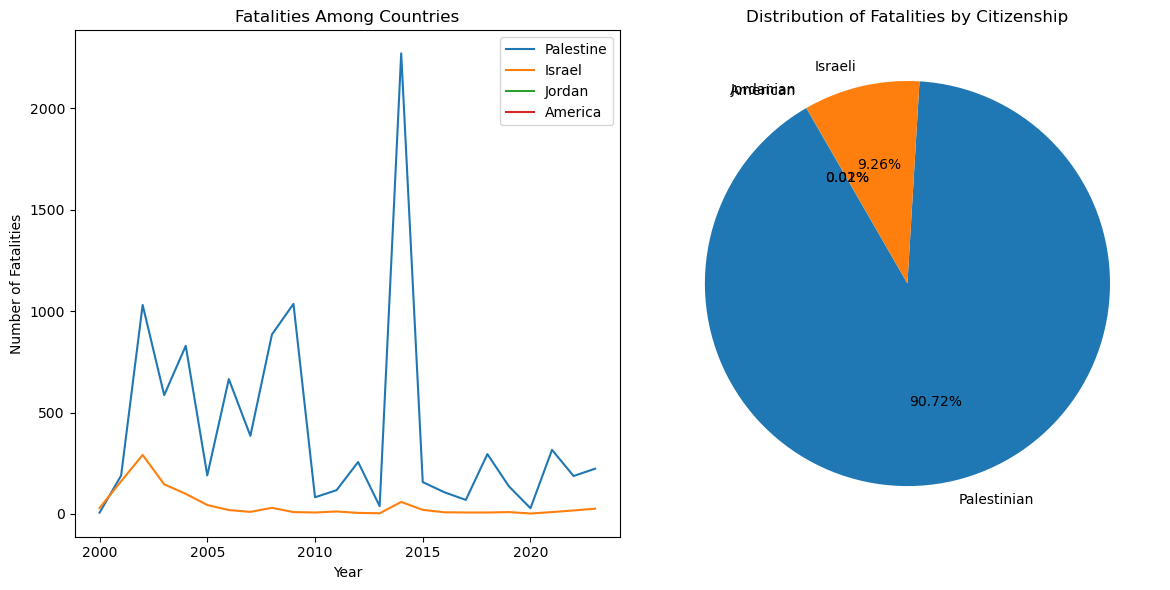

In [31]:
years = list(palestine.keys())
values1 = [palestine.get(year, None) for year in years]
values2 = [israel.get(year, None) for year in years]
values3 = [jordan.get(year, None) for year in years]
values4 = [america.get(year, None) for year in years]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# line chart
ax1.plot(years, values1, label='Palestine')
ax1.plot(years, values2, label='Israel')
ax1.plot(years, values3, label='Jordan')
ax1.plot(years, values4, label='America')

# Add title and legend
ax1.set_title('Fatalities Among Countries')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Fatalities')
ax1.legend()

# pie chart
ax2.pie(citizenship_counts, labels=citizenship_counts.index, autopct='%1.2f%%', startangle=120)
ax2.set_title('Distribution of Fatalities by Citizenship')

plt.tight_layout()
plt.show()

Conclusion: 
- From the pie chart, we can see that the majority of the dead are `Palestinians`, representing 90.72% of the total dead whereas fatalities of Israeli only at 9.26%.
- As the line graph shows, the casualties of Palestine are always `greater` than the ones of Israel.
- The trend:
  - A sharp `increase` in deaths happened around 2002.
  - After 2002, the number of deaths went `down`, hitting a `low` point in 2005.
  - From 2005 to 2008, there was another `rise` in deaths.
  - After 2008, deaths `decreased` and `stayed fairly` steady until around 2013.
  - The `highest` number of deaths occurred in 2014.
  - Between 2018 and 2023, we're seeing a `gradual increase` in fatalities.

### Question 6: Among the casualities, whether the number of people who took part in hostilities are greater than those who did nothing or not? If not, who account for the majority in the fatalities? Analyze the relationships associated with this group.
- **Benefits of answering this question:**
  - `Targeted Aid`: Helps direct aid and resources to the group that needs it most.
  - `Conflict Resolution`: Informs strategies for resolving conflicts by understanding who is most affected.
  - `International Attention`: Draws international attention to the specific group facing the greatest impact, encouraging support and intervention.
  - `Policy Development`: Helps policymakers create targeted policies for protecting specific vulnerable groups.

Preprocessing:
1. Make a copy of Dataframe to avoid conflicts and create a column named year from column `date_of_event`.
2. Group the dataset by `took_part_in_the_hostilities` then find out the distribution of fatalities based on hostility participation.

In [32]:
df_copy = fatality_df.copy()
participation = df_copy['took_part_in_the_hostilities'].value_counts().to_dict()
participation

{'No': 4653,
 'Yes': 3465,
 'Israelis': 771,
 'Unknown': 598,
 'Object of targeted killing': 200}

Analysis:
- Plot a bar chart from `participation`. Point out the distribution of fatalities of each group. Finally, find out which group has the most number of fatalities ever before.
  - `Convert` keys and values of this dictionary into list for visualization.
  - `Plot bars` and a for loop to `note values` on the top of each bar.
  - `Set` x and y-axis label, `title` for the first chart.
- Plot a pie chart from `participation`: to help us observe more clearly from the bar chart by pointing out the proportion of each group.

/tmp/ipykernel_5948/589103992.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(groups, rotation=45)


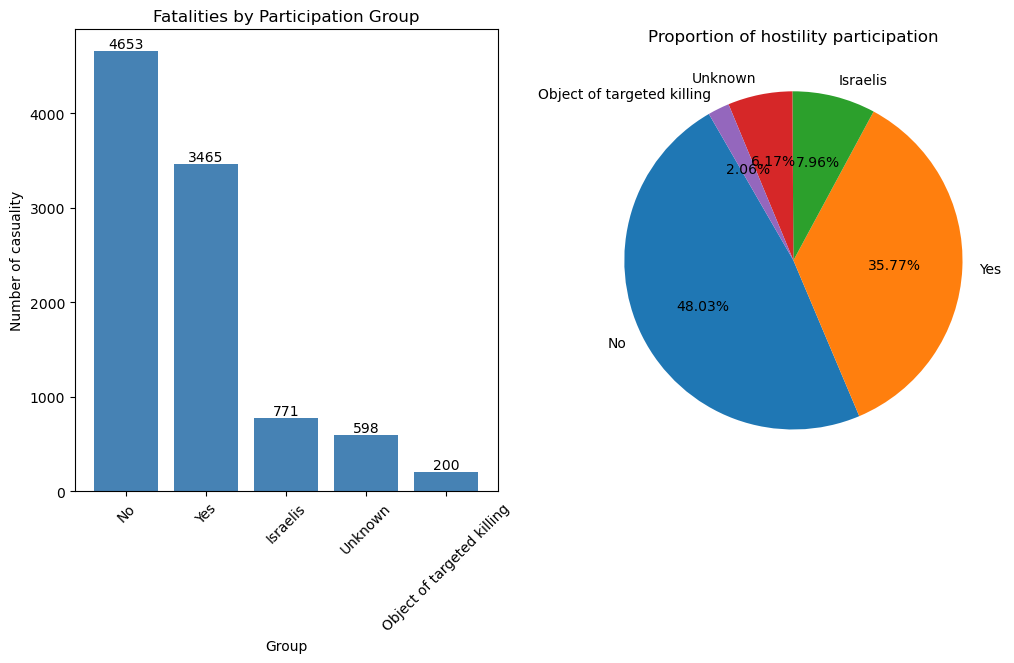

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
groups = list(participation.keys())
numbers = list(participation.values())


bars = ax1.bar(groups, numbers, color='steelblue')
ax1.set_xlabel('Group')
ax1.set_ylabel('Number of casuality')
ax1.set_title('Fatalities by Participation Group')
ax1.set_xticklabels(groups, rotation=45)

# Display values on top of the bars
for bar, num in zip(bars, numbers):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(num),
             ha='center', va='bottom')


ax2.pie(numbers,labels=groups, autopct='%1.2f%%', startangle=120)
ax2.set_title('Proportion of hostility participation')

plt.show()

- As two above charts show, the group of casualities that `did not participate` in the war is the most `greatest`. Let's go deeper to explore the impacts on this group.
- Preprocessing:
  - Make a copy dataset from origin dataset.
  - Filter the non-participated casualities by filtering `No` values in `took_part_in_the_hostilities` column.
  - Task 1: Manipulate `killed_by` column to find out the `main factors` to the deaths of this group.  - Task 2: Manipulate `notes` column to attain some `major keywords` related to their deaths.


In [34]:
df_copy = fatality_df.copy()
non_participated_casualties = df_copy[df_copy['took_part_in_the_hostilities'] == 'No']
killed_by = df_copy['killed_by'].value_counts().to_dict()
temp = {}
for key, value in killed_by.items():
    if 'Israeli' in key:
        temp['Israeli'] = temp.get('Israeli', 0) + value
    else:
        temp['Palestinian'] = value
killed_by = temp
killed_by

{'Israeli': 10089, 'Palestinian': 1028}

Analysis:
- Plot a bar chart from `killed_by`: Visualize the number of people killed by 2 forces(Israel and Palestine-Hamas) to give the observation which side caused more deaths.
- `Convert` keys and values of this dictionary into list for visualization.
- `Plot bars` and a for loop to `note values` on the top of each bar.
- `Set` x and y-axis label, `title` and `show`.

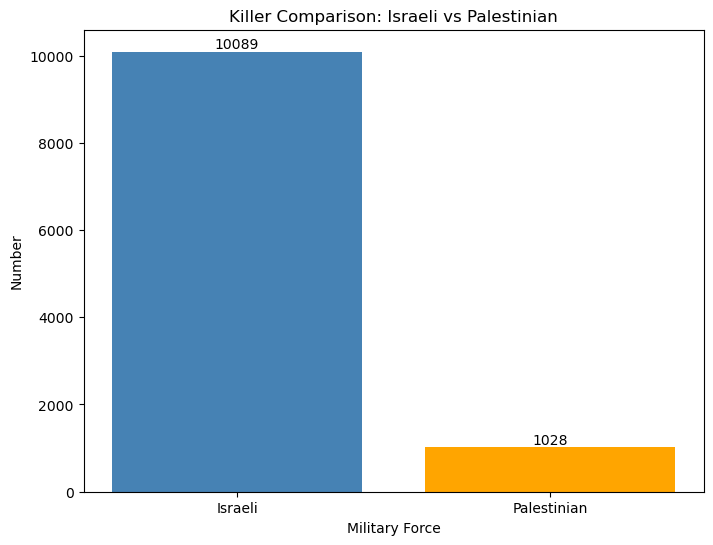

In [35]:
groups = list(killed_by.keys())
numbers = list(killed_by.values())
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(groups, numbers, color=['steelblue', 'orange'])

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

ax.set_xlabel('Military Force')
ax.set_ylabel('Number')
ax.set_title('Killer Comparison: Israeli vs Palestinian')

plt.show()

Analysis:
- From `non_participated_casualties`, we choose `notes` column to do this step.
- First, we concatenate all the text data in the `notes` column of the non_participated_casualties DataFrame into a single string. Then set the background color for the word cloud to `white`.
- Create a `WordCloud` object with specified parameters such as width, height, background color, and font size range.
- Plot the word cloud using the `imshow` function from `Matplotlib` with `bilinear interpolation`.
- Finally, `remove` x and y-axis sticks, `set` title and `show` the plot.

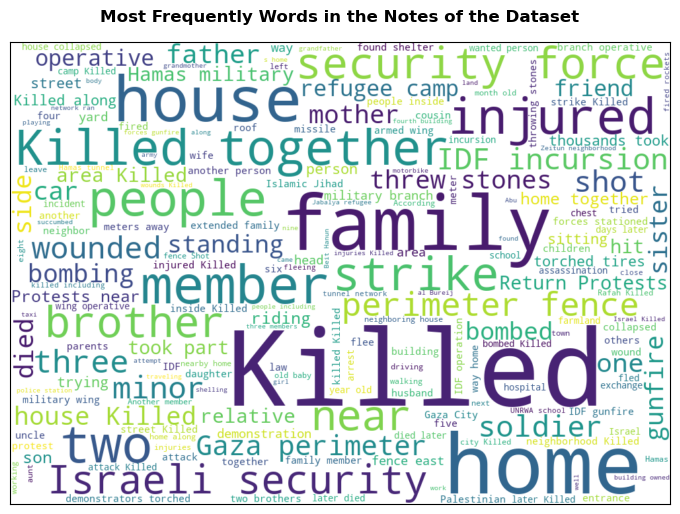

In [36]:
# Set comment words
cloud_of_words = ''.join(non_participated_casualties['notes'].astype(str))

facecolor = 'white'
wordcloud = WordCloud(width=1000, height=700,background_color=facecolor, min_font_size=10, max_font_size=160).generate(cloud_of_words)

## Plot the World Cloud image
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.xticks([]), plt.yticks([])
plt.title('Most Frequently Words in the Notes of the Dataset', weight='bold', fontsize=12, pad=15)
plt.show()

Conclusion:
- The people who `did not participate` in the war were killed the most.
- The `Israel military force` is the main factor that put thousands of innocents to the sword.
- The `Killed` word implies that almost these casualities were killed, not naturally died. Moreover:
  - `Killed together` means they were killed together with their `family`(`brother`, `mother`, `father`, `parents`, `wife`,...), `friend`,...
  - Some were killed during the enemy's `incursion`, some were killed while `standing`, driving `car` or `riding`.
  - Casualities were killed by `bombing`, `gunfire`, `strike`,...